## Background
I recently read [Michael Grothaus's article](https://www.fastcompany.com/3050319/lessons-learned/how-giving-up-refined-sugar-changed-my-brain) on his positive experiences with giving up refined sugar. Reading this article convinced me that abstaining from sugar was a good idea, and my doctor was enthusiastic about the idea.

In the pursuit of minimizing my refined/added sugar consumption, I have two additional considerations. First, I don't cook and I have no interest in learning. Second, I'm not concerned about minimizing calories because I'm about 6'2", around 200 lbs, and my favorite way to exercise is lifting weights (bro). I think I need around 3000 calories per day to maintain my regimen, but I've never rigorously calculated it. I usually just eat until I feel full.

As anyone who has tried to quit refined sugar knows, it is hard to find food that does not contain it -- especially at restaurants. Scouring the internet, I've found endless articles and blog posts about how to cook food without sugar. To belabor the point, I'm happy for these people but I don't care to learn how to cook. Changing a single lifestyle habit such as consuming no refined/added sugar is difficult enough on its own. Changing two (eliminating sugar and cooking instead of going out) is a (wait for it) \**recipe*\* for failure.

Instead of manually looking over menus and nutrition data for the places I patronize, I decided to build some tools to help with the following analysis.

I should make the disclaimer that I am absolutely **not** a dietician nor a physician and so you should take the following analysis with a grain of salt (heh). The responsible thing to do is to talk to your doctor if you have concerns about how your diet might be affecting your health.

[The American Heart Association recommends](http://www.heart.org/HEARTORG/GettingHealthy/NutritionCenter/HealthyEating/Frequently-Asked-Questions-About-Sugar_UCM_306725_Article.jsp) that women consume no more than 100 calories per day of added sugars and men consume no more than 150 calories per day of added sugars. These values work out to about 20g for women and 30g for men, assuming (lets call it) a specific energy of [5cal/g](http://www.nutritionix.com/i/usda/sugars-granulated-1-serving-1-cube/463d6237e531d7b3a164a862) for sugar.

Its also very important to note that the American Heart Association makes a distinction between naturally occuring sugars and added sugar:

> **Are all sugars bad?**
>
> No, but added sugars add calories and zero nutrients to food. Adding a limited amount of sugars to foods that provide important nutrients—such as whole-grain cereal, flavored milk or yogurt—to improve their taste, especially for children, is a better use of added sugars than nutrient-poor, highly sweetened foods.

My conclusion from this statement: you could do worse than to eat 1000 calories of fresh blueberries.

Unfortunately, if you are someone who wants to limit their added/refined sugar consumption, there is no US Federal regulation requiring manufacturers to include information about the amount of added vs. naturally occuring sugar in a food product. From what I've read, one can get an idea of the source of sugar in a food product by reading the list of ingredients; if the word "sugar" appears in the list, chances are that sugar is refined. For example, [a giant 32oz container of Dannon plain yogurt](http://www.amazon.com/Dannon-Natural-Quart-Plain-Yogurt/dp/B00RASDV2E/) contains 12g of sugar per serving, which seems like a lot in light of the American Heart Association recommendations above. However, reading the ingredients list shows this yogurt is made only from milk and yogurt cultures. Thus, this food product contains no added sugar (nevertheless, you probably shouldn't eat the whole 32oz in one sitting).


## Analysis
The six restaurants I frequently patronize fall into two main categories: burger places and "Mexican". There are a mix of the more legacy fast-food places like McDonald's, Wendy's, (and to perhaps a lesser extent) Taco Bell. The rest, Five Guys, Chipotle, and Qdoba, are upstart fast casual.

I first wanted to get a sense of the sugar in each restaurant's menu. I downloaded the nutrition information of each restaurant's entire menu using the [Nutritionix API](http://www.nutritionix.com/api) and attempted to plot a histogram, but I soon found that each restaurant's menu didn't yield an apples-to-apples comparison. Some restaurants included beverages, condiments, etc. while others did not. Therefore, I categorized the menu items of each restaurant by adding category data to each database element. The categories I used were beverage, dessert, condiment, side, and entree. Note that I did not categorize menu items according to meal, i.e. breakfast, lunch, and dinner. Once the items were categorized, I was able to plot histograms of the entree menu items for each restaurant; those histograms are given below.

In [1]:
# Initialize environment
%matplotlib inline
import matplotlib.pyplot as plt
import json
import sqlite3
import minimum_sugar
import numpy as np

database_filename = "menu_data.sqlite3"

# I want the names in the following order
restaurant_names = ["Wendy's",
                    "McDonald's",
                    "Five Guys",
                    "Qdoba",
                    "Taco Bell",
                    "Chipotle",]

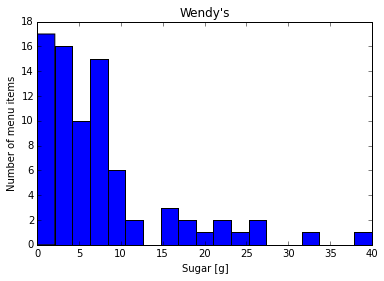

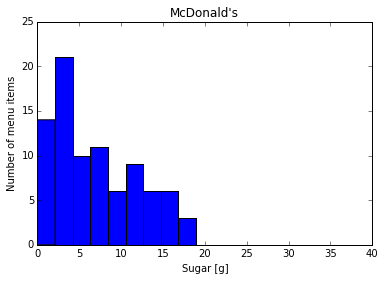

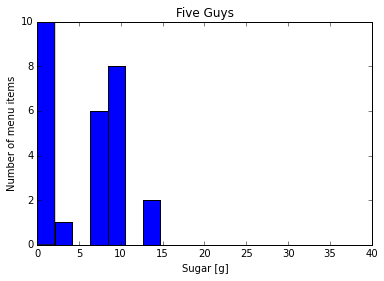

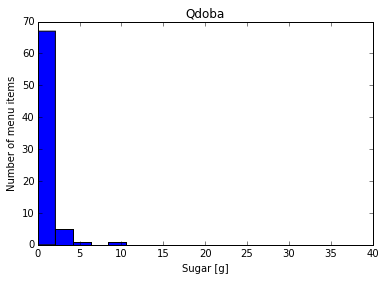

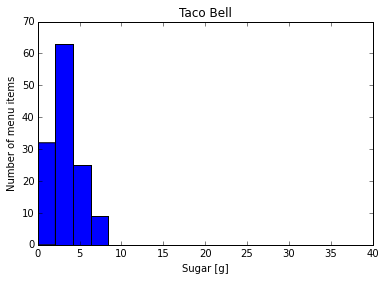

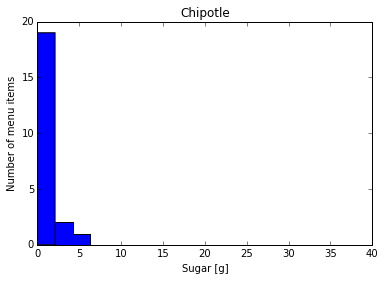

In [2]:
with sqlite3.connect(database_filename) as conn:
    cursor = conn.cursor()
    
    # Determine max sugar to properly scale plots
    cursor.execute("SELECT MAX(nf_sugars) FROM menu_data WHERE menu_category = 'entree'")
    sugar_max = cursor.fetchall()
    sugar_max = sugar_max[0][0]
    
    # Plot results
    for restaurant_name in restaurant_names:
        cursor.execute("SELECT nf_sugars FROM menu_data WHERE menu_category = 'entree' AND brand_name = ?", (restaurant_name,))
        sugars = cursor.fetchall()
        
        fig = minimum_sugar.menu_histogram(sugars, x_max=sugar_max, param_name="Sugar [g]", title=restaurant_name)
        plt.show()

### Maximum sugar
Perhaps not surprisingly, the individual menu items featuring the maximum amount of sugar are offered by Wendy's and McDonald's. Wendy's is the winner in this category with a healthy sounding menu item: "[Apple Pecan Chicken Salad, Full Size](http://www.nutritionix.com/i/wendys/apple-pecan-chicken-salad-full-size/521b95ca4a56d006d578b6f7)" containing 40g of sugar. I wanted to give Wendy's the benefit of the doubt and believe that the sugar comes from the fruit. Unfortunately, Wendy's website features so much unnecessary HTML bling that I wasn't able to find the ingrediants for this menu item within a single click. This poor website design choice soured my positive feelings about Wendy's and now I assume they are trying to obfuscate their nutrition information because they have something to hide.

In [3]:
minimum_sugar.print_max_sugar_menu_item(database_filename, "Wendy's")

Max sugar: 40
Item Name: Apple Pecan Chicken Salad, Full Size


The most sugar-rich menu items for McDonald's are the [Big Breakfast With Hotcakes (Large Size Biscuit)](http://www.nutritionix.com/i/mcdonalds/big-breakfast-with-hotcakes-large-size-biscuit-/513fc9e73fe3ffd40300109d), [Big Breakfast With Hotcakes And Egg Whites (Regular Biscuit)](http://www.nutritionix.com/i/mcdonalds/big-breakfast-with-hotcakes-and-egg-whites-regular-biscuit-/521b95c74a56d006d578b11c), and [Big Breakfast With Hotcakes (Regular Size Biscuit)](http://www.nutritionix.com/i/mcdonalds/big-breakfast-with-hotcakes-regular-size-biscuit-/513fc9e73fe3ffd40300109e) with 17g each. Note that Wendy's has nine entree menu items with sugar greater than McDonald's Big Breakfast, listed below.

In [4]:
mcd_txt = "Maximum sugar situation at McDonald's:"
print mcd_txt
print len(mcd_txt) * "="
minimum_sugar.print_max_sugar_menu_item(database_filename, "McDonald's")

Maximum sugar situation at McDonald's:
Max sugar: 17
Item Name: Big Breakfast With Hotcakes (Large Size Biscuit)
Max sugar: 17
Item Name: Big Breakfast With Hotcakes And Egg Whites (Regular Biscuit)
Max sugar: 17
Item Name: Big Breakfast With Hotcakes (Regular Size Biscuit)


In [5]:
wen_vs_mcd = "Wendy's menu items with more sugar than max. McDonald's item"
print wen_vs_mcd
print len(wen_vs_mcd) * "="

with sqlite3.connect(database_filename) as conn:
    select_txt = """
        SELECT item_name, nf_sugars 
            FROM menu_data 
            WHERE nf_sugars > 17 
                AND brand_name = 'Wendy''s' 
                AND menu_category = 'entree'
            ORDER BY nf_sugars DESC
        """
    
    cursor = conn.cursor()       
    cursor.execute(select_txt)
    for return_txt in cursor.fetchall():
        print return_txt[0] + ": " + str(return_txt[1])

Wendy's menu items with more sugar than max. McDonald's item
Apple Pecan Chicken Salad, Full Size: 40
Steel-Cut Oatmeal with Cranberries and Pecans: 33
Steel-Cut Oatmeal with Apples and Caramel: 26
BBQ Ranch Chicken Salad, Full Size: 26
Pulled Pork Sandwich w/ Spicy BBQ: 25
Pulled Pork Sandwich w/ Sweet BBQ: 23
Apple Pecan Chicken Salad, Half Size: 22
Steel-Cut Oatmeal with Summer Berries: 20
Asian Cashew Chicken Salad, Full Size: 18


Of the burger places, Five Guys has the lowest ceiling on sugar. Unfortunately for the vegetarians out there, the two menu items with 14g sugar are the [Veggie Sandwich](http://www.nutritionix.com/i//veggie-sandwich/521b95cb4a56d006d578b9bc) and [Cheese Veggie Sandwich](http://www.nutritionix.com/i/five-guys/cheese-veggie-sandwich/521b95cb4a56d006d578b9a7). I've never ordered either of these sandwiches (nor did I realize they exist), but my guess is the sugar comes from the [bun](http://www.nutritionix.com/i//bun/521b95cb4a56d006d578b9a3) and ketchup -- removing those components should lower the total sugar. On the other hand, removing the bun from these sandwiches leaves you with a pile of vegetables, at which point you should probably just head over to Chopt. In fact, are there any vegetarians that go to Five Guys for food?

In [6]:
minimum_sugar.print_max_sugar_menu_item(database_filename, "Five Guys")

Max sugar: 14
Item Name: Veggie Sandwich
Max sugar: 14
Item Name: Cheese Veggie Sandwich


Looking at the histograms, it seems that Chipotle's menu has the lowest amount of sugar per menu item. This conclusion is a little deceiving: the menu items listed for Chipotle are actually components used to assemble menu items such as delicious burritos. The story is similar for Qdoba. The [Sofritas](http://www.nutritionix.com/i//sofritas/52cdcbe1051cb9eb320014de) has the most sugar at 5g, but there's no mention of sugar in the [list of ingrediants](http://chipotle.com/ingredient-statement) for this item. My guess is the sugar comes in with the soybeans.

In [7]:
minimum_sugar.print_max_sugar_menu_item(database_filename, "Chipotle")

Max sugar: 5
Item Name: Sofritas


Taco Bell has 9 entree menu items tied for the most sugar (7g). In list form:

* [Biscuit Taco - Bacon, Egg & Cheese](http://www.nutritionix.com/i/taco-bell/biscuit-taco-bacon-egg-cheese/463d0791647dd7e10220bcec)
* [Biscuit Taco - Sausage, Egg & Cheese](http://www.nutritionix.com/i/taco-bell/biscuit-taco-sausage-egg-cheese/463d0791de7395dfeb525dcf)
* [Biscuit Taco](http://www.nutritionix.com/i//biscuit-taco/463d0791fd4113f3304e4ad8)
* [Fiesta Taco Salad](http://www.nutritionix.com/i//fiesta-taco-salad/463d07918aba11ca9cce9a9a)
* [Biscuit Taco - Sausage & Cheese](http://www.nutritionix.com/i//biscuit-taco-sausage-cheese/463d07919d093ab2244fdab0)
* [Fiesta Taco Salad - Chicken](http://www.nutritionix.com/i//fiesta-taco-salad-chicken/463d07911a4c50142dc1e860)
* [Fiesta Taco Salad - Beef](http://www.nutritionix.com/i//fiesta-taco-salad-beef/463d079126dd0a381c93e2d8)
* [Fiesta Taco Salad - Steak](http://www.nutritionix.com/i//fiesta-taco-salad-steak/463d079195e49a2a64314a35)
* [Biscuit Taco - Egg & Cheese](http://www.nutritionix.com/i//biscuit-taco-egg-cheese/463d0791dd2a297b4b709929)

Generally speaking, the burger places (McDonald's, Wendy's, and Five Guys) have a wider distribution in terms of sugar than the "Mexican" places.

In [8]:
minimum_sugar.print_max_sugar_menu_item(database_filename, "Taco Bell")

Max sugar: 7
Item Name: Biscuit Taco - Bacon, Egg & Cheese
Max sugar: 7
Item Name: Biscuit Taco - Sausage, Egg & Cheese
Max sugar: 7
Item Name: Biscuit Taco
Max sugar: 7
Item Name: Fiesta Taco Salad
Max sugar: 7
Item Name: Biscuit Taco - Sausage & Cheese
Max sugar: 7
Item Name: Fiesta Taco Salad - Chicken
Max sugar: 7
Item Name: Fiesta Taco Salad - Beef
Max sugar: 7
Item Name: Fiesta Taco Salad - Steak
Max sugar: 7
Item Name: Biscuit Taco - Egg & Cheese


### Minimum sugar vs. calories
Its possible to calculate things like average and standard deviation for the histograms above, but I don't see the utility in that information. Nobody goes to a restaurant and selects random items off the menu. My rule of thumb is to not order anything with more than 3g of sugar, and zero sugar is preferred. Using this rubric, the restaurants I considered have the following number of menu items at that part of the distribution:

In [9]:
for brand_name in restaurant_names:
    with sqlite3.connect(database_filename) as conn:
        select_txt = """
            SELECT COUNT(item_name) 
            FROM menu_data 
            WHERE brand_name = ?
            AND menu_category = 'entree'
            AND nf_sugars < 3
            """
        cursor = conn.cursor()
        cursor.execute(select_txt, (brand_name, ))
        num_items = cursor.fetchone()
        
        print brand_name + ": " + str(num_items[0])

Wendy's: 17
McDonald's: 14
Five Guys: 10
Qdoba: 67
Taco Bell: 32
Chipotle: 19


As I mentioned above, I am interested in consuming more calories than someone smaller or with a different exercise regimen. Thus, my visualization of interest is the histogram of calories for the menu items containing less than three grams of sugar.

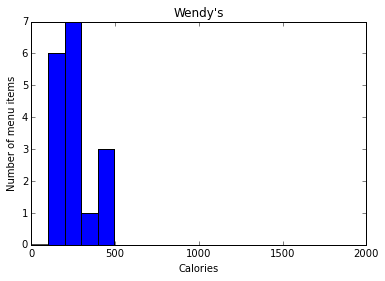

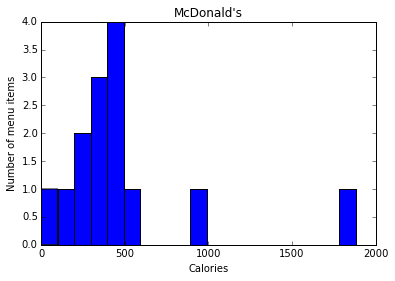

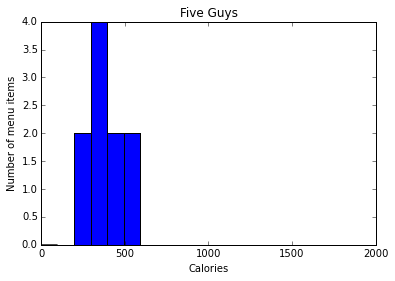

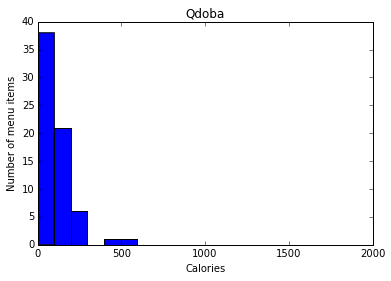

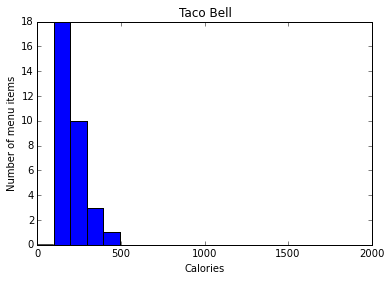

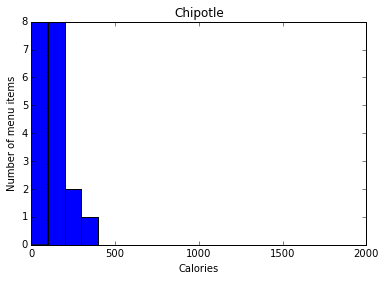

In [10]:
with sqlite3.connect(database_filename) as conn:
    # Uniformly scale the horizontal axis on all plots
    select_txt = """
        SELECT MAX(nf_calories) 
        FROM menu_data 
        WHERE menu_category = 'entree'
        AND nf_sugars < 3
        """
    cursor = conn.cursor()
    cursor.execute(select_txt)
    
    calories_max = cursor.fetchone()[0]
    
    # Plot results
    select_txt = """
        SELECT nf_calories
        FROM menu_data
        WHERE menu_category = 'entree'
        AND brand_name = ?
        AND nf_sugars < 3
        """

    for restaurant_name in restaurant_names:
        cursor.execute(select_txt, (restaurant_name, ))
        calories = cursor.fetchall()
        
        fig = minimum_sugar.menu_histogram(calories, x_max=calories_max, param_name="Calories", title=restaurant_name)
        plt.show()

Astonishingly, McDonald's features a menu item with less than 3g sugar and nearly 2000 calories (!) -- the [40 piece Chicken McNuggets](http://www.nutritionix.com/i/mcdonalds/chicken-mcnuggets-40-piece-/ae495051f4042f9fabd0857a). I suspect McDonald's intended this menu item to be purchased for parties and tailgates as opposed to a meal for an individual. McDonald's [20 piece Chicken McNuggets](http://www.nutritionix.com/i/mcdonalds/chicken-mcnuggets-20-piece-/513fc9e73fe3ffd4030010a9) is the runner-up in terms of calories with exactly half: 940 calories.

In [11]:
with sqlite3.connect(database_filename) as conn:
    select_txt = """
        SELECT item_name, nf_calories 
        FROM menu_data
        WHERE brand_name = 'McDonald''s'
        AND nf_sugars < 3
        ORDER BY nf_calories DESC
        """
    cursor = conn.cursor()
    cursor.execute(select_txt)

    for item in cursor.fetchall()[:2]:
        print item[0] + ": " + str(item[1])

Chicken McNuggets (40 Piece): 1880
Chicken McNuggets (20 Piece): 940


Everything else is around 500 calories or less. All the menu items with less than 3g sugar are printed below, sorted by restaurant and calories (high to low).

In [12]:
with sqlite3.connect(database_filename) as conn:
    select_txt = """
        SELECT item_name, nf_calories, nf_sugars
        FROM menu_data
        WHERE brand_name = ?
        AND menu_category = 'entree'
        AND nf_sugars < 3
        ORDER BY nf_calories DESC
        """
    cursor = conn.cursor()
    
    for brand_name in restaurant_names:
        cursor.execute(select_txt, (brand_name, ))
        print brand_name
        print "=" * len(brand_name)
        for item in cursor.fetchall():
            print item[0] + ": " + str(item[1]) + "cal, " + str(item[2]) + "g sugar"
            
        print "\r"

Wendy's
10-Piece Spicy Chicken Nuggets: 470cal, 0g sugar
10-Piece Chicken Nuggets: 450cal, 0g sugar
Crispy Chicken Caesar Wrap: 410cal, 1g sugar
Homestyle Chicken Go Wrap: 340cal, 1g sugar
6-Piece Spicy Chicken Nuggets: 280cal, 0g sugar
Spicy Chicken Breast: 270cal, 0g sugar
Sausage & Egg Burrito: 270cal, 1g sugar
Homestyle Chicken Breast: 270cal, 1g sugar
6-Piece Chicken Nuggets: 270cal, 0g sugar
Caesar Side Salad: 250cal, 2g sugar
1/4 lb. Hamburger Patty: 240cal, 0g sugar
4-Piece Spicy Chicken Nuggets: 190cal, 0g sugar
4-Piece Chicken Nuggets: 180cal, 0g sugar
Premium Cod: 180cal, 0g sugar
Crispy Chicken Patty: 170cal, 0g sugar
Grilled Chicken Breast: 130cal, 0g sugar
Jr. Hamburger Patty: 110cal, 0g sugar

McDonald's
Chicken McNuggets (40 Piece): 1880cal, 1g sugar
Chicken McNuggets (20 Piece): 940cal, 0g sugar
Sausage Biscuit With Egg (Regular Size Biscuit): 510cal, 2g sugar
Chicken McNuggets (10 Piece): 470cal, 0g sugar
Sausage McMuffin With Egg: 450cal, 2g sugar
Sausage Biscuit (Re

## The worst offenders? Beverages.
Perhaps not surprisingly, beverages are a great way to consume a lot of sugar over a short period. To make this point, consider the following histogram plots in which each restaurant's entree items appear along with beverages. Please note that Nutritionix had no beverages listed in its database for some of the restaurants in this analysis. I still plot their histograms with the others for the sake of comparison.

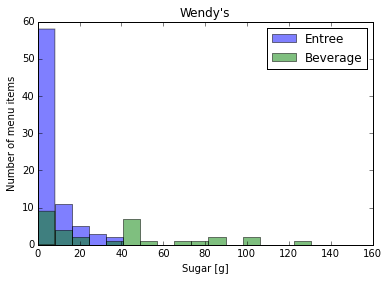

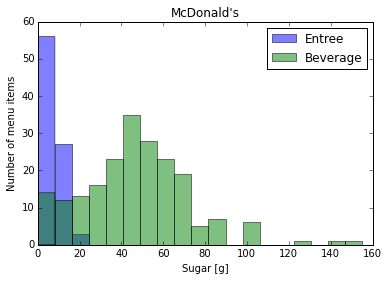

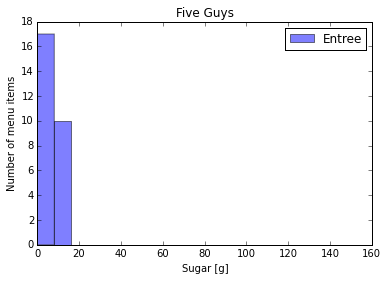

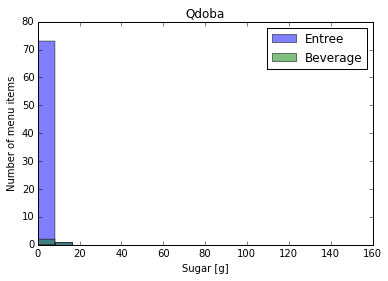

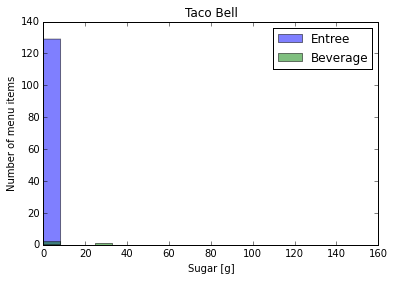

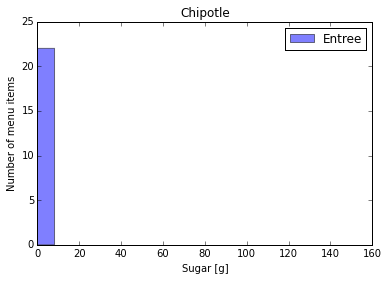

In [13]:
with sqlite3.connect(database_filename) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT MAX(nf_sugars) FROM menu_data WHERE menu_category = 'beverage'")
    sugar_max = cursor.fetchone()[0]
    
    select_txt = """
        SELECT nf_sugars
        FROM menu_data
        WHERE menu_category = ?
        AND brand_name = ?
        """
    
    for brand_name in restaurant_names:
        cursor.execute(select_txt, ("entree", brand_name, ))
        entree_sugars = cursor.fetchall()

        cursor.execute(select_txt, ("beverage", brand_name, ))
        beverage_sugars = cursor.fetchall()
        
        fig = minimum_sugar.menu_histogram(entree_sugars, x_max=sugar_max, param_name="Sugar [g]", title=brand_name, alpha=0.5, label="Entree")
        if len(beverage_sugars) > 0:
            fig = minimum_sugar.menu_histogram(beverage_sugars, x_max=sugar_max, param_name="Sugar [g]", fig=fig, alpha=0.5, label="Beverage")
        
        plt.legend()
        plt.show()

I don't have much to say about beverages except just don't order them. There seems to be no upside.

## Remarks
Rules of thumb: 

* If Ron Swanson wouldn't drink it (water, black coffee, scotch), it probably contains sugar. The sugar histograms show that beverages contain lots of sugar.
* Avoid ketchup. And most other sauces. [Mustard](http://www.nutritionix.com/i/frenchs/mustard-classic-yellow/51d2fc51cc9bff111580e297) is the superior condiment anyway so use it instead. I didn't show the analysis, but typically sauces and dressings contain too much sugar. Anecdotal evidence of the high sugar content of sauces can be seen in the Wendy's pulled pork sandwiches above. On the other hand, eastern NC style barbecue sauce, The One True Barbecue Sauce, is the [exception](http://uncpress.unc.edu/HolySmoke/samplerecipes.html).
* Order your burger without ketchup and the bun and you should have enough calories with minimal sugar.
* A lot of low-sugar entree menu items are based on chicken instead of beef.

During the course of this analysis, I was struck by the fact that the legacy/non-fast casual restaurants have a **ton** of menu items. McDonald's has >350 where Chipotle only has like 25. Granted, Nutritionix had no data on beverage offerings from Chipotle whereas they did have beverages from McDonalds. Nonetheless, McDonalds still has 86 items I categorized as entrees vs. Chipotle's 25.

I can't imagine the amout of complexity that number of menu items adds to the management of the company. I also can't see how McDonalds gets rid of this complexity (i.e. sheds menu items) without alienating the customers these items intended to serve. It seems like this amount of complexity is an accretion over many years and is likely a result of their success. It seems eminently plausible that over the years executives at McDonalds thought, "We are dominating this part of the market which is basically tapped out. In order to experience even more growth, we need to expand into other markets. How do we expand into other markets while leveraging the power of this brand to crush the competition?"

In [14]:
with sqlite3.connect(database_filename) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT COUNT(item_name) FROM menu_data WHERE brand_name = 'McDonald''s' AND menu_category = 'entree'")
    
    print "Number of McDonald's entree menu items:", str(cursor.fetchone()[0])

Number of McDonald's entree menu items: 86


## Source
This repository in which this report was developed is hosted on [github](https://github.com/jrsmith3/minimum_sugar).